# ÎπÖÎç∞Ïù¥ÌÑ∞ÏôÄ Í∏àÏúµÏûêÎ£åÎ∂ÑÏÑù ÌåÄÌîÑÎ°úÏ†ùÌä∏

XGboost ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìïú ÏùÄÌñâ ÎåÄÏ∂úÏùò Î∂ÄÎèÑ Ïó¨Î∂Ä ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï

Í∞ïÏÉÅÎ¨µ(20259013) / ÍπÄÌòïÌôò(20249132) / Ïú†ÏÑùÌò∏(20249264) / Ïù¥ÌòÑÏ§Ä(20249349) / ÏµúÏòÅÏÑú(20249430) / ÏµúÏû¨ÌïÑ(20249433)

ÏΩîÎìú Ï∂îÍ∞Ä

## 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ : 12Í∞úÏùò ÏàòÏπòÌòïÎ≥ÄÏàòÏôÄ 15Í∞úÏùò Î¨∏ÏûêÌòï Î≥ÄÏàò(Î™©Ï†ÅÎ≥ÄÏàò Ìè¨Ìï®)

In [1]:
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ : 12Í∞úÏùò ÏàòÏπòÌòïÎ≥ÄÏàòÏôÄ 15Í∞úÏùò Î¨∏ÏûêÌòï Î≥ÄÏàò(Î™©Ï†ÅÎ≥ÄÏàò Ìè¨Ìï®)
import pandas as pd
data = pd.read_csv("data/lending_club_loan_two.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### 1.1 ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î∞è Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî

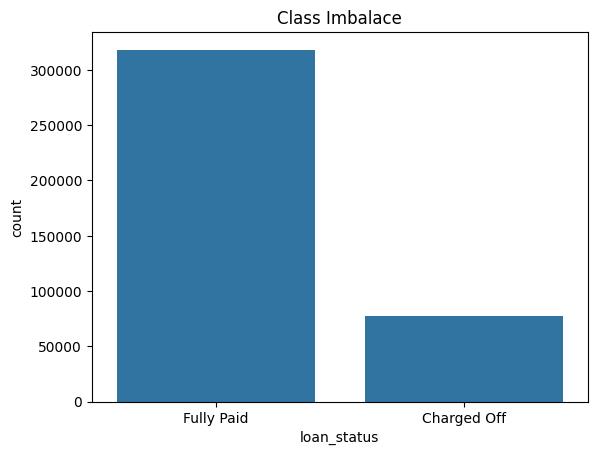

In [2]:
# ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÏãúÍ∞ÅÌôî : Î™©Ï†ÅÎ≥ÄÏàòÎäî ÏïΩ 8:2Î°ú Î∂àÍ∑†Ìòï Ï°¥Ïû¨
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=data['loan_status'])
plt.title("Class Imbalace")
plt.show()

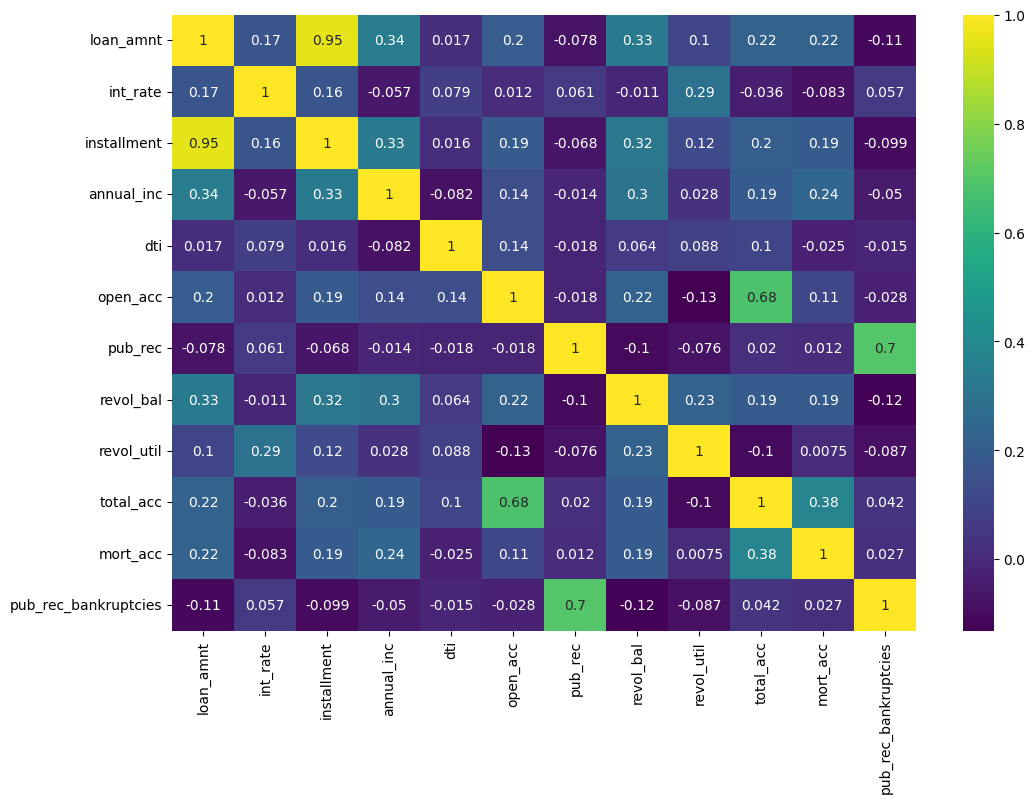

In [3]:
# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Í∑∏Î¶¨Í∏∞ : ÏùºÎ∂Ä Î≥ÄÏàòÏóê ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏
plt.figure(figsize=(12, 8))

numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.show()

### 1.2 Ï£ºÏöî Î≥ÄÏàòÎ≥Ñ Î™©Ï†ÅÎ≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏

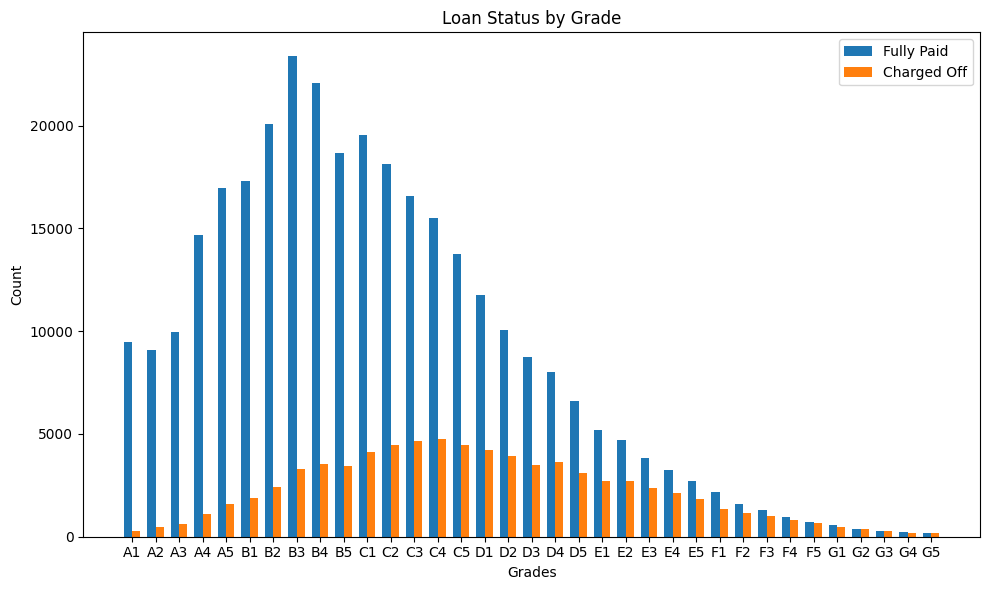

In [4]:
# Ïã†Ïö©Ï†êÏàòÎ≥Ñ Î™©Ï†ÅÎ≥ÄÏàòÏùò Î∂ÑÌè¨ ÌôïÏù∏ : ÎÇÆÏùÄ Îì±Í∏âÏùºÏàòÎ°ù Î∂ÄÎèÑÏú® ÎÜíÏùå
fully_paid = data.loc[data['loan_status'] == 'Fully Paid', 'sub_grade'].value_counts().sort_index()
charged_off = data.loc[data['loan_status'] == 'Charged Off', 'sub_grade'].value_counts().sort_index()

grades = sorted(set(fully_paid.index).union(set(charged_off.index)))

x = range(len(grades))
width = 0.35  # bar Ìè≠

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([i - width/2 for i in x], fully_paid.reindex(grades, fill_value=0), width=width, label='Fully Paid')
ax.bar([i + width/2 for i in x], charged_off.reindex(grades, fill_value=0), width=width, label='Charged Off')

ax.set_xlabel('Grades')
ax.set_ylabel('Count')
ax.set_title('Loan Status by Grade')
ax.set_xticks(x)
ax.set_xticklabels(grades)
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/n2/jbh_0_091bx8qgz7j87t2qwc0000gp/T/ipykernel_6327/1229110848.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

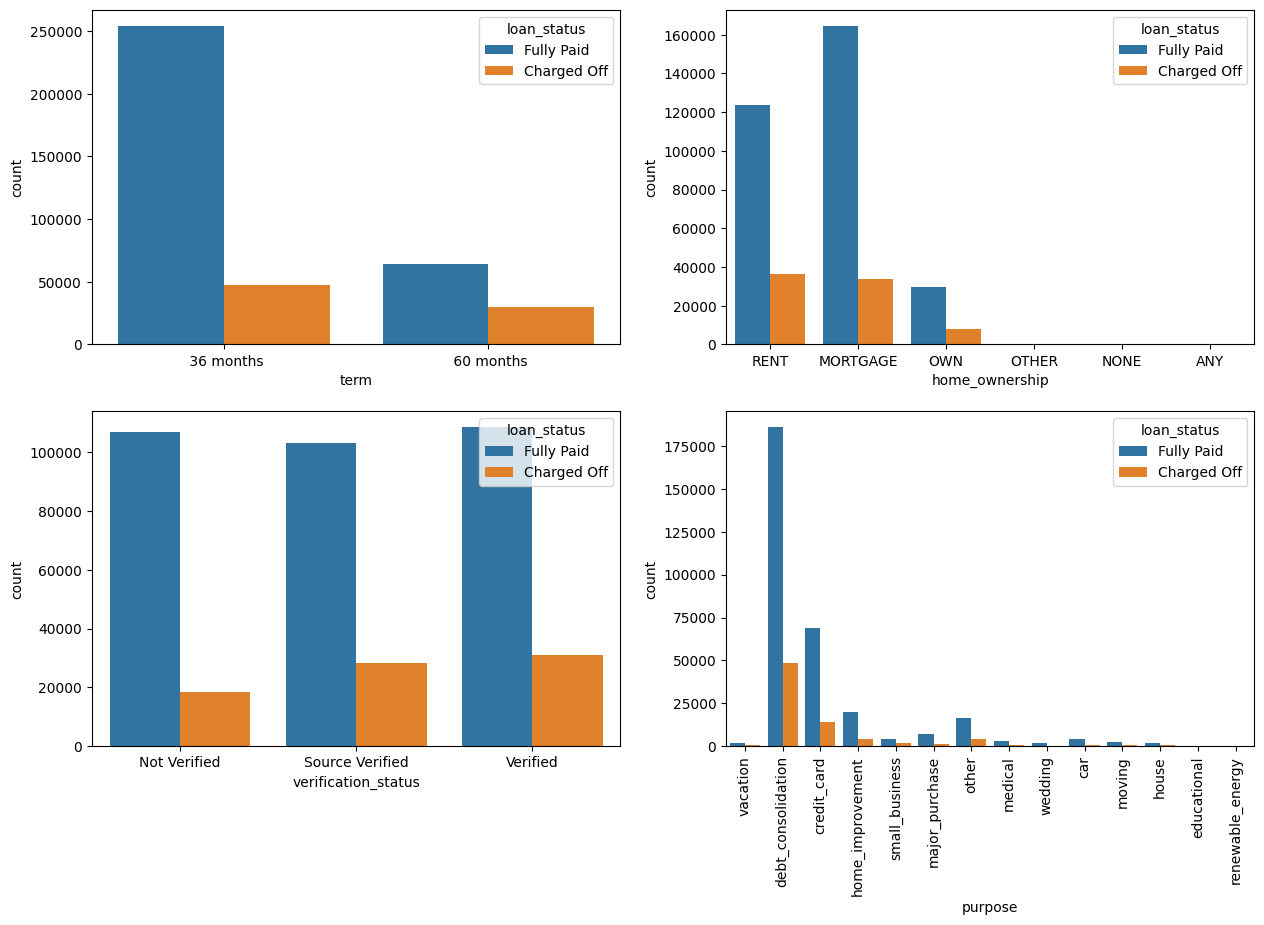

In [5]:
# ÎåÄÏ∂úÍ∏∞Í∞Ñ, ÏßëÎ≥¥Ïú†Ïó¨Î∂Ä Îì± Ï£ºÏöî Î≥ÄÏàòÏóê ÎåÄÌïú Î™©Ï†ÅÎ≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [6]:
# Î¨∏ÏûêÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í Í∞úÏàò Ï∂úÎ†• : ÏùºÎ∂Ä Î≥ÄÏàòÏóê Í≥ºÎèÑÌïòÍ≤å ÎßéÏùÄ Í≥†Ïú†Í∞í ÌôïÏù∏
categorical_columns = data.select_dtypes(include='object')
categorical_columns.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              173105
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   115
loan_status                 2
purpose                    14
title                   48816
earliest_cr_line          684
initial_list_status         2
application_type            3
address                393700
dtype: int64

## 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [7]:
# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# Ï£ºÏÜåÎäî Ïö∞Ìé∏Î≤àÌò∏Îßå Ï∂îÏ∂ú
data['zip_code'] = data.address.apply(lambda x: x[-5:])
data['zip_code'].nunique()

10

In [8]:
# Ïßë ÏÜåÏú†Ïó¨Î∂ÄÏóêÏÑú Í∑πÏÜåÏàòÏùò Í≤ΩÏö∞ Ï†úÏô∏
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  

# ÎåÄÏ∂úÍ±¥Î≥ÑÎ°ú Î™®Îëê Îã¨Îùº Í≥†Ïú†Í∞íÏù¥ ÎÑàÎ¨¥ ÎßéÍ±∞ÎÇò(100Í∞ú Ïù¥ÏÉÅ), Îã§Î•∏ Î≥ÄÏàòÎ°úÎ∂ÄÌÑ∞ Ï∂îÏ∂úÌï†ÏàòÏûàÎäî Îì± Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
drop_cols = ['emp_title', 'emp_length', 'grade', 'title', 'address', 'issue_d', 'earliest_cr_line']
data.drop(columns=drop_cols, inplace=True)

# ÎåÄÏ∂úÍ∞úÏõîÏàòÎäî ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

# Î¨∏ÏûêÌòïÎ≥ÄÏàò Î≥ÄÌôò : ÎùºÎ≤®Ïù∏ÏΩîÎî©, ÏõêÌï´Ïù∏ÏΩîÎî©
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Î™©Ï†ÅÎ≥ÄÏàò (loan_status) ÎùºÎ≤® Ïù∏ÏΩîÎî©
label_encoder = LabelEncoder()
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

# sub_grade ÎùºÎ≤® Ïù∏ÏΩîÎî© : ÌèâÍ∞ÄÎì±Í∏âÏùÄ ÏàúÏÑúÍ∞Ä ÏûàÏùå
data['sub_grade'] = label_encoder.fit_transform(data['sub_grade'])

# ÎÇòÎ®∏ÏßÄ Î¨∏ÏûêÌòï Î≥ÄÏàòÎì§ ÏõêÌï´ Ïù∏ÏΩîÎî©
categorical_columns = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   sub_grade                            396030 non-null  int64  
 5   annual_inc                           396030 non-null  float64
 6   loan_status                          396030 non-null  int64  
 7   dti                                  396030 non-null  float64
 8   open_acc                             396030 non-null  float64
 9   pub_rec                              396030 non-null  float64
 10  revol_bal                            396030 non-null  float64
 11  revol_util   

### 2.1 ÌõàÎ†®/ÌèâÍ∞ÄÎç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

Î™©Ï†ÅÎ≥ÄÏàòÏùò ÌÅ¥ÎûòÏä§ Î∂àÍ∑†ÌòïÏù¥ Ï°¥Ïû¨ÌïòÎØÄÎ°ú, ÌõàÎ†®/ÌèâÍ∞ÄÎç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Ïãú **Í≥ÑÏ∏µÏ†Å ÏÉòÌîåÎßÅ(Stratified Sampling)**ÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§.
Ïù¥Îäî Í∞Å Î∂ÑÌï† ÏÑ∏Ìä∏ÏóêÏÑú ÌÅ¥ÎûòÏä§ ÎπÑÏú®Ïù¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÎêòÎèÑÎ°ù Î≥¥Ïû•ÌïòÏó¨, 
ÌäπÌûà ÏÜåÏàò ÌÅ¥ÎûòÏä§(Î∂ÄÎèÑ)Í∞Ä ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Í≥ºÏÜå ÎòêÎäî Í≥ºÎåÄ ÌëúÌòÑÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.

In [10]:
# ÌõàÎ†®/ÌèâÍ∞ÄÎç∞Ïù¥ÌÑ∞ Î∂ÑÌï† : 7ÎåÄ3Î°ú Î∂ÑÌï† (Í≥ÑÏ∏µÏ†Å ÏÉòÌîåÎßÅ Ï†ÅÏö©)
from sklearn.model_selection import train_test_split

X = data.drop(columns=['loan_status']) 
y = data['loan_status']

# stratify=y Îß§Í∞úÎ≥ÄÏàòÎ•º Ï∂îÍ∞ÄÌïòÏó¨ Í≥ÑÏ∏µÏ†Å ÏÉòÌîåÎßÅ Ï†ÅÏö©
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Î∂ÑÌï† ÌõÑ ÌÅ¥ÎûòÏä§ ÎπÑÏú® ÌôïÏù∏
print("ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
print(y.value_counts(normalize=True))

print("\nÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
print(y_train.value_counts(normalize=True))

print("\nÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
print(y_test.value_counts(normalize=True))

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
loan_status
1    0.803871
0    0.196129
Name: proportion, dtype: float64

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
loan_status
1    0.803871
0    0.196129
Name: proportion, dtype: float64

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
loan_status
1    0.80387
0    0.19613
Name: proportion, dtype: float64


Í≥ÑÏ∏µÏ†Å ÏÉòÌîåÎßÅÏùÑ ÌÜµÌï¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Í∞Ä ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
Ïù¥Îäî Î™®Îç∏Ïù¥ ÌõàÎ†® Ï§ëÏóê Ìé∏Ìñ•ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïòÍ≥†, ÌÖåÏä§Ìä∏ ÏÑ±Îä•Ïù¥ Ïã§Ï†ú ÏÑ±Îä•ÏùÑ Îçî Ï†ïÌôïÌïòÍ≤å Î∞òÏòÅÌïòÎèÑÎ°ù Ìï©ÎãàÎã§.

In [11]:
# 3. Í≤∞Ï∏°Í∞í Î∞è Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (Ï§ëÍ∞ÑÍ∞í + Isolation Forest)
from sklearn.ensemble import IsolationForest

# ÏàòÏπòÌòï Î≥ÄÏàòÏùò Í≤∞Ï∏°Í∞íÏùÑ Ï§ëÍ∞ÑÍ∞íÏúºÎ°ú Ï≤òÎ¶¨
X_train_fillna = X_train.copy().fillna(X_train.median())

X_train_numeric = X_train_fillna.select_dtypes(include='number')
original_len = len(X_train_numeric)

# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï†úÍ±∞ (ÏàòÏπòÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ÏÑúÎßå 1% Ï†úÍ±∞)
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(X_train_numeric)

# Ïù¥ÏÉÅÏπòÍ∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
X_train_clean = X_train_fillna[outliers == 1]
y_train_clean = y_train[outliers == 1]

### 3.1 Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî

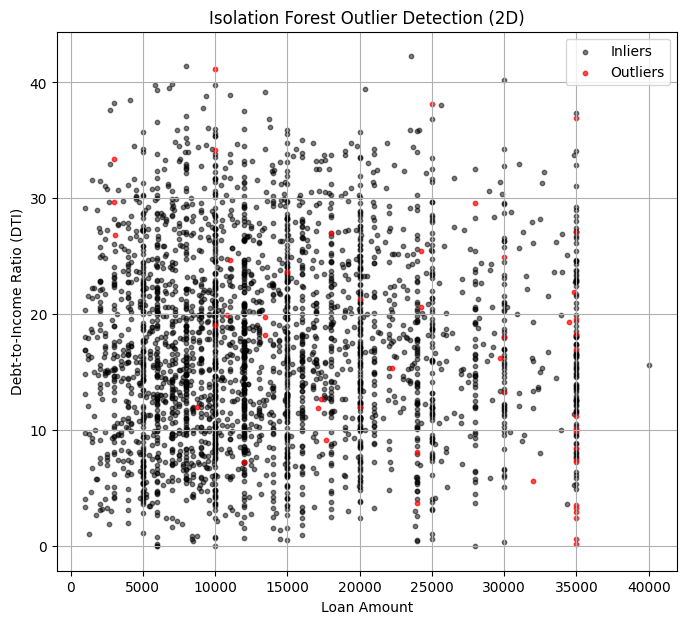

In [12]:
# ÎåÄÏ∂ú Í∑úÎ™®ÏôÄ DTIÎ•º Ïù¥Ïö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
columns = ['loan_amnt', 'dti']
X_viz = X_train[columns].copy()

X_outliers = X_viz.loc[outliers == -1]
X_clean = X_viz.loc[outliers == 1]

# 2D ÏãúÍ∞ÅÌôî
X_clean_sample = X_clean.sample(n=3000, random_state=42)
X_outliers_sample = X_outliers.sample(n=50, random_state=42)

plt.figure(figsize=(8, 7))
plt.scatter(X_clean_sample['loan_amnt'], X_clean_sample['dti'],
            c='black', label='Inliers', alpha=0.5, s=10)
plt.scatter(X_outliers_sample['loan_amnt'], X_outliers_sample['dti'],
            c='red', label='Outliers', alpha=0.7, s=10)

plt.xlabel('Loan Amount')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.title('Isolation Forest Outlier Detection (2D)')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 TSNEÎ•º Ïù¥Ïö©Ìïú Ï∞®Ïõê Ï∂ïÏÜå Î∞è Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî

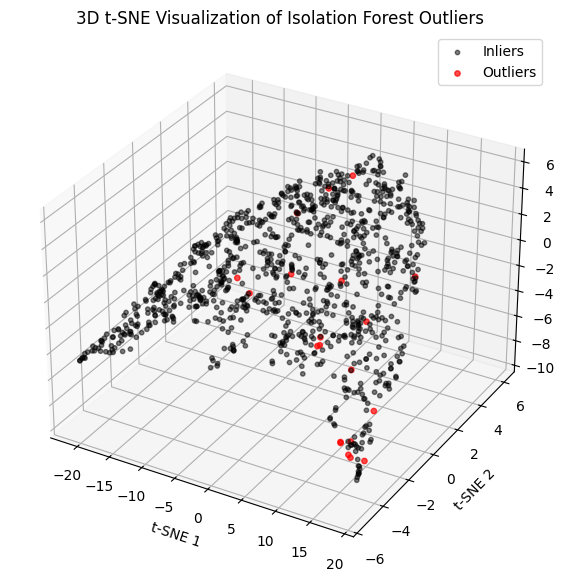

In [13]:
# 4. TSNEÎ•º Ïù¥Ïö©Ìïú Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî Î∂ÑÏÑù : Í∏∞Ï°¥ Ï†ïÎ≥¥Î°úÎäî ÏãúÍ∞ÅÌôî ÌïúÍ≥ÑÍ∞Ä ÏûàÏñ¥ Ï∞®ÏõêÏ∂ïÏÜå Ï†ÅÏö©
from sklearn.manifold import TSNE
import numpy as np

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú(ÏïΩ 1ÎßåÍ∞ú)ÌïòÏó¨ T-SNEÎ°ú 3Ï∞®Ïõê Ï∂ïÏÜå
X_tsne_input_clean = X_train_numeric[outliers==1].sample(n=1000,random_state=42).select_dtypes(include='number')
X_tsne_input_outliers = X_train_numeric[outliers==-1].sample(n=20,random_state=42).select_dtypes(include='number')
X_tsne_input = pd.concat([X_tsne_input_clean,X_tsne_input_outliers], axis=0)

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_tsne_input)

# ÏãúÍ∞ÅÌôî
labels = np.array([1]*1000 + [-1]*20)
tsne_df = pd.DataFrame(X_tsne, columns=['x', 'y', 'z'])
tsne_df['outlier'] = labels

inliers = tsne_df[tsne_df['outlier'] == 1]
outliers_df = tsne_df[tsne_df['outlier'] == -1]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inliers['x'], inliers['y'], inliers['z'],
           c='black', label='Inliers', alpha=0.5, s=10)
ax.scatter(outliers_df['x'], outliers_df['y'], outliers_df['z'],
           c='red', label='Outliers', alpha=0.7, s=15)

ax.set_title('3D t-SNE Visualization of Isolation Forest Outliers')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.legend()
plt.show()

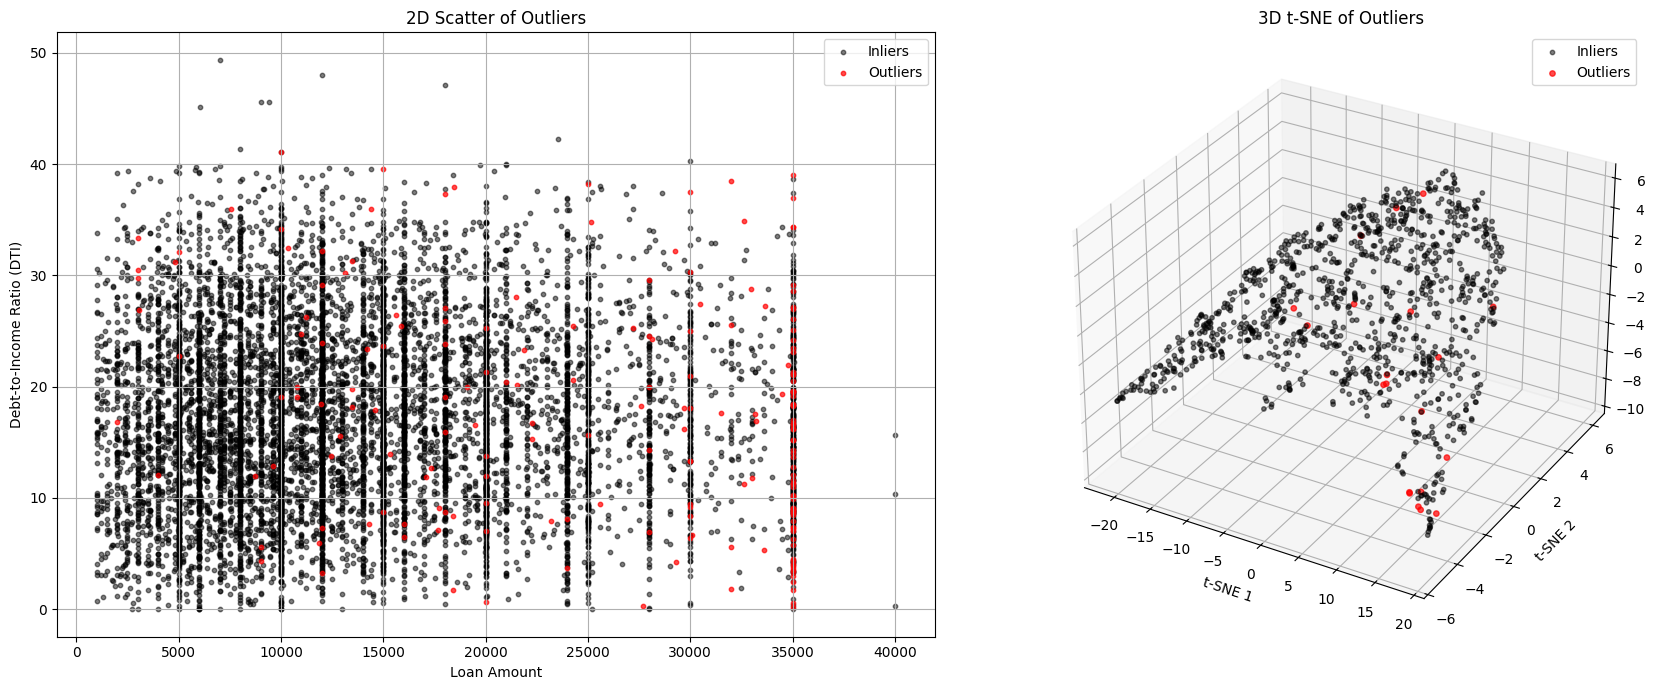

In [14]:
# Î≥ëÎ†¨ ÏãúÍ∞ÅÌôî
X_clean_sample = X_clean.sample(n=10000, random_state=42)
X_outliers_sample = X_outliers.sample(n=200, random_state=42)

fig = plt.figure(figsize=(18, 7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_clean_sample['loan_amnt'], X_clean_sample['dti'],
            c='black', label='Inliers', alpha=0.5, s=10)
ax1.scatter(X_outliers_sample['loan_amnt'], X_outliers_sample['dti'],
            c='red', label='Outliers', alpha=0.7, s=10)
ax1.set_xlabel('Loan Amount')
ax1.set_ylabel('Debt-to-Income Ratio (DTI)')
ax1.set_title('2D Scatter of Outliers')
ax1.legend()
ax1.grid(True)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(tsne_df[tsne_df['outlier'] == 1]['x'],
            tsne_df[tsne_df['outlier'] == 1]['y'],
            tsne_df[tsne_df['outlier'] == 1]['z'],
            c='black', label='Inliers', alpha=0.5, s=10)
ax2.scatter(tsne_df[tsne_df['outlier'] == -1]['x'],
            tsne_df[tsne_df['outlier'] == -1]['y'],
            tsne_df[tsne_df['outlier'] == -1]['z'],
            c='red', label='Outliers', alpha=0.7, s=15)
ax2.set_title('3D t-SNE of Outliers')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.set_zlabel('t-SNE 3')
ax2.legend()

plt.tight_layout()
plt.show()

## 4. Boruta ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìïú Î≥ÄÏàòÏÑ†ÌÉù

In [15]:
# 5. Boruta ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìïú Î≥ÄÏàòÏÑ†ÌÉù 
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Î≥ÄÏàò ÏãùÎ≥Ñ
onehot_columns = X_train_clean.select_dtypes(include='bool').columns.tolist()

# ÏàòÏπòÌòï + ÎùºÎ≤® Ïù∏ÏΩîÎî©Îêú Î≥ÄÏàò ÏÑ†ÌÉù
X_boruta = X_train_clean.drop(columns=onehot_columns)
y_boruta = y_train_clean.copy()

# Boruta ÏïåÍ≥†Î¶¨Ï¶ò Ï†ÅÏö©
rf = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)

np.int = np.int64
np.float = np.float64
np.bool = np.bool_

brtfs = BorutaPy(estimator=rf,n_estimators=7,verbose=1,random_state=42,max_iter=15,alpha=0.01)
brtfs.fit(X_boruta.values, y_boruta.values)

selected_features = X_boruta.columns[brtfs.support_].tolist()    
X_selected = X_boruta[selected_features]
X_onehot = X_train_clean[onehot_columns]
print(f"Number of selected features(Non-onehot): {len(selected_features)}")
print(selected_features)

Iteration: 1 / 15
Iteration: 2 / 15
Iteration: 3 / 15
Iteration: 4 / 15
Iteration: 5 / 15
Iteration: 6 / 15
Iteration: 7 / 15
Iteration: 8 / 15
Iteration: 9 / 15
Iteration: 10 / 15
Iteration: 11 / 15
Iteration: 12 / 15
Iteration: 13 / 15
Iteration: 14 / 15


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	10
Tentative: 	2
Rejected: 	2
Number of selected features(Non-onehot): 10
['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'mort_acc']


In [ ]:
# ÏµúÏ¢Ö ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ÏôÑÎ£å
X_train_brtfs = pd.concat([X_selected, X_onehot], axis=1)
X_train_brtfs.info()

## 5. Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌèâÍ∞Ä

### 5.1 ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†ú Î∞è ÍµêÏ∞® Í≤ÄÏ¶ù Í∞úÏÑ†

Í∏∞Ï°¥ ÏΩîÎìúÏóêÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Î¨∏Ï†úÏ†êÏù¥ ÏûàÏóàÏäµÎãàÎã§:

1. **Í≤ÄÏ¶ù Î¨¥Í≤∞ÏÑ± Ïù¥Ïäà (Validation Integrity Issue)**: ADASYNÏúºÎ°ú ÏÉùÏÑ±Îêú Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞Í∞Ä ÍµêÏ∞® Í≤ÄÏ¶ù(CV) Í≥ºÏ†ïÏóêÏÑú ÌõàÎ†® Î∞è Í≤ÄÏ¶ù Ìè¥ÎìúÏóê Î™®Îëê Ìè¨Ìï®ÎêòÏóàÏäµÎãàÎã§.

2. **Í≥ºÎåÄÌèâÍ∞ÄÎêú ÏÑ±Îä• ÏßÄÌëú (Inflated Performance Metrics)**: Í≤ÄÏ¶ù ÏÑ∏Ìä∏Ïóê Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞Í∞Ä Ìè¨Ìï®ÎêòÎ©¥, Î™®Îç∏ÏùÄ ÏÇ¨Ïã§ÏÉÅ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÌòïÎêú Î≤ÑÏ†ÑÏúºÎ°ú ÌèâÍ∞ÄÎêòÏñ¥ ÏÑ±Îä•Ïù¥ Í≥ºÎåÄÌèâÍ∞ÄÎê©ÎãàÎã§.

3. **Í≥ºÏ†ÅÌï© ÏúÑÌóò (Overfitting Risk)**: Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞Î°ú Í≤ÄÏ¶ùÌïòÎ©¥ Î™®Îç∏Ïù¥ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏùºÎ∞òÌôî Îä•Î†• ÎåÄÏã† Ìï©ÏÑ± Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï† ÏúÑÌóòÏù¥ ÏûàÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ **imblearn.pipeline**ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÍµêÏ∞® Í≤ÄÏ¶ùÏùò Í∞Å Ìè¥Îìú ÎÇ¥ÏóêÏÑúÎßå Ïò§Î≤ÑÏÉòÌîåÎßÅÏù¥ Ï†ÅÏö©ÎêòÎèÑÎ°ù ÏàòÏ†ïÌñàÏäµÎãàÎã§. Ïù¥ Î∞©ÏãùÏùÄ:

- Í∞Å CV Ìè¥ÎìúÏùò **ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå** ADASYNÏù¥ Ï†ÅÏö©Îê®
- Í≤ÄÏ¶ùÏùÄ Ìï≠ÏÉÅ **ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞**Î°úÎßå ÏàòÌñâÎê®
- Î™®Îç∏Ïùò Ïã§Ï†ú ÏÑ±Îä•ÏùÑ Îçî Ï†ïÌôïÌïòÍ≤å ÌèâÍ∞ÄÌï† Ïàò ÏûàÏùå

### 5.2 XGBoost Î™®Îç∏ ÏµúÏ†ÅÌôî Ïù¥Îã®Í≥Ñ Ï†ëÍ∑ºÎ≤ï

XGBoost Î™®Îç∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏóê Ïù¥Îã®Í≥Ñ Ï†ëÍ∑ºÎ≤ï(Two-Step Optimization)ÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§:

**1Îã®Í≥Ñ: Ï¥àÍ∏∞ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ**
- ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùÄ ÌïôÏäµÎ•†(0.1)Í≥º Í≥†Ï†ïÎêú n_estimators Í∞íÏúºÎ°ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ ÌÉêÏÉâ
- Í∞Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©Ïù¥ ÎèôÏùºÌïú ÌïôÏäµ Í∏∞Ìöå(Í∞ôÏùÄ Ìä∏Î¶¨ Í∞úÏàò)Î•º Í∞ñÎèÑÎ°ù Î≥¥Ïû•
- ÍµêÏ∞® Í≤ÄÏ¶ù ÎÇ¥ÏóêÏÑú ADASYN Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ Ï†ïÌôïÌûà Ï†ÅÏö©

**2Îã®Í≥Ñ: ÏµúÏ†Å Î™®Îç∏ ÎØ∏ÏÑ∏ Ï°∞Ï†ï**
- 1Îã®Í≥ÑÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïóê ÎÇÆÏùÄ ÌïôÏäµÎ•†(0.01)Í≥º ÎÜíÏùÄ n_estimators(10000) Ï†ÅÏö©
- early_stopping_roundsÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò Ìä∏Î¶¨ Í∞úÏàò Í≤∞Ï†ï
- Ï†ÑÏ≤¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ

**Ïù¥Îü¨Ìïú Ï†ëÍ∑ºÎ≤ïÏùò Ïù¥Ï†ê:**
- Í≥µÏ†ïÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê: 1Îã®Í≥ÑÏóêÏÑú Î™®Îì† Ï°∞Ìï©Ïù¥ ÎèôÏùºÌïú tree Í∞úÏàòÎ°ú ÌèâÍ∞ÄÎê®
- Í≥ºÏ†ÅÌï© Î∞©ÏßÄ: ÎÇÆÏùÄ ÌïôÏäµÎ•†Í≥º early stoppingÏúºÎ°ú Î™®Îç∏ ÏïàÏ†ïÏÑ± Ìñ•ÏÉÅ
- Í≥ÑÏÇ∞ Ìö®Ïú®ÏÑ±: ÎØ∏ÏÑ∏ Ï°∞Ï†ïÏùÄ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏóêÎßå ÏàòÌñâ

In [ ]:
# 1Îã®Í≥Ñ: Ï¥àÍ∏∞ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ - ÎÜíÏùÄ ÌïôÏäµÎ•†Î°ú Ïó¨Îü¨ Ï°∞Ìï© ÌÉêÏÉâ
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV

# ADASYNÏùÑ ÌååÏù¥ÌîÑÎùºÏù∏ ÎÇ¥ÏóêÏÑú Ï†ÅÏö©ÌïòÏó¨ ÍµêÏ∞® Í≤ÄÏ¶ù Ïãú Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î¨¥Í≤∞ÏÑ± Ïú†ÏßÄ
step1_pipeline = ImbPipeline([
    ('sampler', ADASYN(random_state=42)),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42, learning_rate=0.1))
])

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï - Í≥†Ï†ïÎêú n_estimatorsÎ°ú Í≥µÏ†ïÌïú ÎπÑÍµê Î≥¥Ïû•
param_dist = {
    'classifier__n_estimators': [100, 300, 500],  # Í≥†Ï†ïÎêú Í∞íÏúºÎ°ú ÌÉêÏÉâ
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__min_child_weight': [0, 0.1, 0.3, 0.5],
    'classifier__gamma': [0, 0.1, 1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0, 0.1, 1],
    'classifier__reg_lambda': [1, 5, 10]
}

# RandomizedSearchCV - Í∞Å CV Ìè¥Îìú ÎÇ¥ÏóêÏÑú Ïò¨Î∞îÎ•¥Í≤å ADASYN Ï†ÅÏö©
step1_search = RandomizedSearchCV(
    estimator=step1_pipeline,
    param_distributions=param_dist,
    n_iter=25,  # Í≥ÑÏÇ∞ ÏûêÏõêÏóê Îî∞Îùº Ï°∞Ï†ï Í∞ÄÎä•
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 1Îã®Í≥Ñ Î™®Îç∏ ÌõàÎ†®
print("1Îã®Í≥Ñ: Ï¥àÍ∏∞ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Ï§ë...")
step1_search.fit(X_train_brtfs, y_train_clean)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(step1_search.best_params_)
print("ÏµúÍ≥† F1 Ï†êÏàò (CV):", step1_search.best_score_)

# ÏÉÅÏúÑ 5Í∞ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© ÌôïÏù∏
step1_results = pd.DataFrame(step1_search.cv_results_)
columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
top_5_params = step1_results[columns].sort_values('rank_test_score').head(5)
print("\nÏÉÅÏúÑ 5Í∞ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©:")
print(top_5_params)

### 5.3 ÏµúÏ†Å Î™®Îç∏ ÎØ∏ÏÑ∏ Ï°∞Ï†ï Î∞è ÏÑ±Îä• ÌèâÍ∞Ä

Ïù¥Ï†ú 1Îã®Í≥ÑÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú ÌïôÏäµÎ•†ÏùÑ ÎÇÆÏ∂îÍ≥†(0.01), Ìä∏Î¶¨ Í∞úÏàòÎ•º ÎäòÎ†§(10000) Ï°∞Í∏∞ Ï§ëÎã®(early stopping)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏµúÏ¢Ö Î™®Îç∏ÏùÑ ÌïôÏäµÌï©ÎãàÎã§.
Ïù¥ Ï†ëÍ∑ºÎ≤ïÏùÄ Î™®Îç∏Ïù¥ Ï≤úÏ≤úÌûà ÌïôÏäµÌïòÎ©¥ÏÑú ÏµúÏ†Å ÏßÄÏ†êÏóêÏÑú Î©àÏ∂ú Ïàò ÏûàÍ≤å Ìï©ÎãàÎã§.

In [ ]:
# 2Îã®Í≥Ñ: ÏµúÏ†Å Î™®Îç∏ ÎØ∏ÏÑ∏ Ï°∞Ï†ï - ÎÇÆÏùÄ ÌïôÏäµÎ•†, ÎÜíÏùÄ n_estimators, early stopping

# 1Îã®Í≥ÑÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
best_params = step1_search.best_params_

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X_test_brtfs = X_test[selected_features + onehot_columns].copy()

# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï† (ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 10%Î•º Í≤ÄÏ¶ùÏóê ÏÇ¨Ïö©)
from sklearn.model_selection import train_test_split
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_brtfs, y_train_clean, test_size=0.1, random_state=42, stratify=y_train_clean
)

# ADASYN Ï†ÅÏö© (ÏµúÏ¢Ö ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå)
adasyn = ADASYN(random_state=42)
X_train_final_resampled, y_train_final_resampled = adasyn.fit_resample(X_train_final, y_train_final)

# ÏµúÏ¢Ö Î™®Îç∏ ÏÉùÏÑ± - ÎÇÆÏùÄ ÌïôÏäµÎ•†, ÎÜíÏùÄ n_estimators, early stopping Ï†ÅÏö©
final_model = XGBClassifier(
    # 1Îã®Í≥ÑÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©
    max_depth=int(best_params['classifier__max_depth']),
    min_child_weight=best_params['classifier__min_child_weight'],
    gamma=best_params['classifier__gamma'],
    subsample=best_params['classifier__subsample'],
    colsample_bytree=best_params['classifier__colsample_bytree'],
    reg_alpha=best_params['classifier__reg_alpha'],
    reg_lambda=best_params['classifier__reg_lambda'],
    # ÎØ∏ÏÑ∏ Ï°∞Ï†ïÏùÑ ÏúÑÌïú ÌååÎùºÎØ∏ÌÑ∞
    learning_rate=0.01,           # ÎÇÆÏùÄ ÌïôÏäµÎ•†
    n_estimators=10000,           # ÎßéÏùÄ Ìä∏Î¶¨ Í∞úÏàò
    early_stopping_rounds=200,    # Ï°∞Í∏∞ Ï§ëÎã®
    eval_metric='logloss',        # ÌèâÍ∞Ä ÏßÄÌëú
    random_state=42,
    verbosity=1
)

# ÏµúÏ¢Ö Î™®Îç∏ ÌõàÎ†® - Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú early stopping Î™®ÎãàÌÑ∞ÎßÅ
print("\n2Îã®Í≥Ñ: ÏµúÏ†Å Î™®Îç∏ ÎØ∏ÏÑ∏ Ï°∞Ï†ï Ï§ë...")
final_model.fit(
    X_train_final_resampled, y_train_final_resampled,
    eval_set=[(X_train_final_resampled, y_train_final_resampled), 
              (X_val_final, y_val_final)],
    verbose=True
)

# ÏµúÏ†Å Ìä∏Î¶¨ Í∞úÏàò ÌôïÏù∏
print(f"ÏµúÏ†Å Ìä∏Î¶¨ Í∞úÏàò: {final_model.best_ntree_limit}")

# ÌïôÏäµ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
evals_result = final_model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['logloss'], label='Training')
plt.plot(evals_result['validation_1']['logloss'], label='Validation')
plt.axvline(x=final_model.best_ntree_limit, color='r', linestyle='--', label=f'Best ntree: {final_model.best_ntree_limit}')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('XGBoost Training Curve')
plt.legend()
plt.grid(True)
plt.show()

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_pred_best = final_model.predict(X_test_brtfs, ntree_limit=final_model.best_ntree_limit)
y_proba_best = final_model.predict_proba(X_test_brtfs, ntree_limit=final_model.best_ntree_limit)[:, 1]

### 5.4 ÏµúÏ¢Ö Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä

In [ ]:
# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print("\n<< ÏµúÏ¢Ö XGBoost Î™®Îç∏ ÏÑ±Îä• >>")
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best))
print("\nÎ∂ÑÎ•ò Î≥¥Í≥†ÏÑú:")
print(classification_report(y_test, y_pred_best))

In [ ]:
# ÏòàÏ∏° ÌôïÎ•† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.histplot(y_proba_best, bins=50, kde=True, color='skyblue')
plt.title("Predict probability")
plt.xlabel("Probability of Class 1")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# ROC Curve
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
plt.figure(figsize=(6,4))
plt.plot(fpr_best, tpr_best, label=f'Best Model ROC (AUC = {roc_auc_score(y_test, y_proba_best):.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Model ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## 6. Î≥ÄÏàò Ï§ëÏöîÎèÑ Î∂ÑÏÑù

### 6.1 XGBoost Î≥ÄÏàò Ï§ëÏöîÎèÑ

In [ ]:
# ÏÉÅÏúÑ 20Í∞ú feature importance
importances = final_model.feature_importances_
features = X_test_brtfs.columns

top_idx = importances.argsort()[::-1][:20]
top_features = features[top_idx]
top_importances = importances[top_idx]

plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

XGBoostÏùò Í∏∞Î≥∏ Î≥ÄÏàò Ï§ëÏöîÎèÑÎäî Î™®Îç∏ Ï†ÑÏ≤¥ÏóêÏÑú Í∞Å ÌäπÏÑ±Ïù¥ ÏñºÎßàÎÇò ÏûêÏ£º ÏÇ¨Ïö©ÎêòÏóàÎäîÏßÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
Í∑∏Îü¨ÎÇò Ïù¥Îäî **Í∞úÎ≥Ñ ÏòàÏ∏°Ïóê ÎåÄÌïú ÌäπÏÑ± Í∏∞Ïó¨ÎèÑ**Î•º ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†µÎã§Îäî ÌïúÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§.

Ïù¥Ï†ú **SHAP(SHapley Additive exPlanations)** Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Îçî ÍπäÏù¥ ÏûàÎäî Î™®Îç∏ Ìï¥ÏÑùÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
SHAPÎäî Í≤åÏûÑ Ïù¥Î°†Ïùò Shapley Í∞íÏóê Í∏∞Î∞òÌïòÏó¨ Í∞Å ÏòàÏ∏°Ïóê ÎåÄÌïú ÌäπÏÑ±Î≥Ñ Í∏∞Ïó¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
Ïù¥Î•º ÌÜµÌï¥ Î™®Îç∏Ïù¥ **Í∞úÎ≥Ñ ÏÇ¨Î°ÄÎ≥ÑÎ°ú** Ïñ¥Îñ§ ÌäπÏÑ±ÏùÑ Ï§ëÏöîÌïòÍ≤å Í≥†Î†§ÌñàÎäîÏßÄ ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

### 6.2 SHAPÎ•º ÌôúÏö©Ìïú Î™®Îç∏ Ìï¥ÏÑù

In [ ]:
# SHAP Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
import shap

# SHAP TreeExplainer ÏÉùÏÑ±
explainer = shap.TreeExplainer(final_model)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÎ∂Ä ÏÉòÌîåÏóê ÎåÄÌïú SHAP Í∞í Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Î©îÎ™®Î¶¨ Ïù¥ÏäàÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
X_train_sample = X_train_brtfs.sample(n=1000, random_state=42)
shap_values = explainer.shap_values(X_train_sample)

# Í∏∞ÎåÄÍ∞í Ï∂úÎ†• (Î™®Îç∏Ïùò Í∏∞Î≥∏ ÏòàÏ∏°Í∞í)
print("Î™®Îç∏Ïùò Í∏∞Î≥∏ ÏòàÏ∏°Í∞í (base value):", explainer.expected_value)

### 6.3 Í∞úÎ≥Ñ ÎåÄÏ∂ú ÏÇ¨Î°ÄÏóê ÎåÄÌïú SHAP Î∂ÑÏÑù

In [ ]:
# ÌäπÏ†ï ÏÉòÌîå ÏòàÏ∏°Ïóê ÎåÄÌïú SHAP Í∞í Î∂ÑÏÑù
# Î∂ÄÎèÑ ÏÇ¨Î°ÄÏôÄ Ï†ïÏÉÅ ÏÉÅÌôò ÏÇ¨Î°Ä Í∞ÅÍ∞Å ÌïòÎÇòÏî© ÏÑ†ÌÉù
loan_idx_default = X_train_sample.index[y_train[X_train_sample.index] == 1][0]  # Î∂ÄÎèÑ ÏÇ¨Î°Ä
loan_idx_paid = X_train_sample.index[y_train[X_train_sample.index] == 0][0]     # Ï†ïÏÉÅ ÏÉÅÌôò ÏÇ¨Î°Ä

# ÏÑ†ÌÉùÎêú ÎåÄÏ∂ú ÏÇ¨Î°ÄÏùò ÌäπÏÑ± Í∞í Ï∂úÎ†•
print("Î∂ÄÎèÑ ÎåÄÏ∂ú ÏÇ¨Î°Ä ÌäπÏÑ±:")
print(X_train_brtfs.loc[loan_idx_default, :].head(10))
print("\nÏ†ïÏÉÅ ÏÉÅÌôò ÎåÄÏ∂ú ÏÇ¨Î°Ä ÌäπÏÑ±:")
print(X_train_brtfs.loc[loan_idx_paid, :].head(10))

# Ïã§Ï†ú ÌÅ¥ÎûòÏä§ ÌôïÏù∏
print("\nÎ∂ÄÎèÑ ÏÇ¨Î°Ä Ïã§Ï†ú ÌÅ¥ÎûòÏä§:", y_train.loc[loan_idx_default])
print("Ï†ïÏÉÅ ÏÉÅÌôò ÏÇ¨Î°Ä Ïã§Ï†ú ÌÅ¥ÎûòÏä§:", y_train.loc[loan_idx_paid])

# ÏòàÏ∏° ÌôïÎ•† ÌôïÏù∏
print("\nÎ∂ÄÎèÑ ÏÇ¨Î°Ä ÏòàÏ∏° ÌôïÎ•†:", final_model.predict_proba(X_train_brtfs.loc[loan_idx_default:loan_idx_default, :])[0][1])
print("Ï†ïÏÉÅ ÏÉÅÌôò ÏÇ¨Î°Ä ÏòàÏ∏° ÌôïÎ•†:", final_model.predict_proba(X_train_brtfs.loc[loan_idx_paid:loan_idx_paid, :])[0][1])

ÏïÑÎûòÏùò SHAP Force PlotÏùÄ Í∞úÎ≥Ñ ÎåÄÏ∂ú ÏÇ¨Î°ÄÏóê ÎåÄÌïú Î™®Îç∏Ïùò ÏòàÏ∏°ÏùÑ ÏÑ§Î™ÖÌï©ÎãàÎã§:

- **Îπ®Í∞ÑÏÉâ** ÌäπÏÑ±ÏùÄ Î∂ÄÎèÑ ÌôïÎ•†ÏùÑ **Ï¶ùÍ∞Ä**ÏãúÌÇ§Îäî ÏöîÏù∏
- **ÌååÎûÄÏÉâ** ÌäπÏÑ±ÏùÄ Î∂ÄÎèÑ ÌôïÎ•†ÏùÑ **Í∞êÏÜå**ÏãúÌÇ§Îäî ÏöîÏù∏
- Í∞Å ÌäπÏÑ±Ïùò **ÎÑàÎπÑ**Îäî Í∑∏ ÏòÅÌñ•Î†•Ïùò **ÌÅ¨Í∏∞**Î•º ÎÇòÌÉÄÎÉÑ
- **base value**Îäî Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤¥Ïùò ÌèâÍ∑† ÏòàÏ∏°Í∞í
- **output value**Îäî Ìï¥Îãπ ÏÇ¨Î°ÄÏùò ÏµúÏ¢Ö ÏòàÏ∏°Í∞í

In [ ]:
# SHAP Force Plot - Î∂ÄÎèÑ ÏÇ¨Î°Ä
plt.figure(figsize=(16, 5))
shap_idx_default = np.where(np.array(X_train_sample.index) == loan_idx_default)[0][0]
shap.force_plot(explainer.expected_value, 
                shap_values[shap_idx_default, :],
                X_train_sample.iloc[shap_idx_default, :],
                matplotlib=True, show=False)
plt.title("SHAP Force Plot - Î∂ÄÎèÑ ÏÇ¨Î°Ä")
plt.tight_layout()
plt.show()

# SHAP Force Plot - Ï†ïÏÉÅ ÏÉÅÌôò ÏÇ¨Î°Ä
plt.figure(figsize=(16, 5))
shap_idx_paid = np.where(np.array(X_train_sample.index) == loan_idx_paid)[0][0]
shap.force_plot(explainer.expected_value, 
                shap_values[shap_idx_paid, :],
                X_train_sample.iloc[shap_idx_paid, :],
                matplotlib=True, show=False)
plt.title("SHAP Force Plot - Ï†ïÏÉÅ ÏÉÅÌôò ÏÇ¨Î°Ä")
plt.tight_layout()
plt.show()

### 6.4 SHAP Í∏ÄÎ°úÎ≤å Î∂ÑÏÑù - Ï†ÑÏ≤¥ ÌäπÏÑ± Ï§ëÏöîÎèÑ

In [ ]:
# SHAP Summary Plot - Î™®Îì† ÌäπÏÑ±Ïùò ÏòÅÌñ•Î†• ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_train_sample, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
# SHAP Summary Plot - Í∞Å ÌäπÏÑ±Í∞íÏóê Îî∞Î•∏ ÏòÅÌñ•Î†• Î≥ÄÌôî ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_train_sample, show=False)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()

SHAP ÏöîÏïΩ ÌîåÎ°ØÏùò Ìï¥ÏÑù:

1. **Feature Importance**:
   - ÎßâÎåÄ Í∑∏ÎûòÌîÑÎäî Í∞Å ÌäπÏÑ±Ïùò ÌèâÍ∑† Ï†àÎåÄ SHAP Í∞í Í∏∞Ï§Ä Ï§ëÏöîÎèÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
   - XGBoostÏùò Í∏∞Î≥∏ feature_importanceÏôÄ Îã¨Î¶¨ Í∞Å ÏòàÏ∏°Ïóê ÎåÄÌïú Í∏∞Ïó¨ÎèÑÏùò ÌèâÍ∑†ÏûÖÎãàÎã§.

2. **Summary Plot**:
   - Í∞Å Ï†êÏùÄ ÌïòÎÇòÏùò ÏÉòÌîåÏóê ÎåÄÌïú ÌïòÎÇòÏùò ÌäπÏÑ± Í∞íÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
   - ÏÉâÏÉÅ: ÌäπÏÑ± Í∞íÏù¥ **ÎÜíÏùÑÏàòÎ°ù Îπ®Í∞ÑÏÉâ**, **ÎÇÆÏùÑÏàòÎ°ù ÌååÎûÄÏÉâ**
   - ÏàòÌèâ ÏúÑÏπò: SHAP Í∞íÏúºÎ°ú, **Ïò§Î•∏Ï™Ω**ÏùÄ Î∂ÄÎèÑ ÌôïÎ•†ÏùÑ **Ï¶ùÍ∞Ä**ÏãúÌÇ§Í≥†, **ÏôºÏ™Ω**ÏùÄ **Í∞êÏÜå**ÏãúÌÇ¥
   - Ïù¥Î•º ÌÜµÌï¥ ÌäπÏÑ± Í∞íÏùò Î≥ÄÌôîÏóê Îî∞Î•∏ Î™®Îç∏ ÏòàÏ∏° ÏòÅÌñ•ÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥, ÏùºÎ∂Ä ÌäπÏÑ±Îì§ÏùÄ Í∞íÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Î∂ÄÎèÑ ÌôïÎ•†Ïù¥ ÎÜíÏïÑÏßÄÎäî Î∞òÎ©¥(Îπ®Í∞Ñ Ï†êÏù¥ Ïò§Î•∏Ï™ΩÏóê ÏúÑÏπò), 
Îã§Î•∏ ÌäπÏÑ±Îì§ÏùÄ Í∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù Î∂ÄÎèÑ ÌôïÎ•†Ïù¥ ÎÜíÏïÑÏßëÎãàÎã§(ÌååÎûÄ Ï†êÏù¥ Ïò§Î•∏Ï™ΩÏóê ÏúÑÏπò).

In [ ]:
# precision recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
avg_precision = average_precision_score(y_test, y_proba_best)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

## 7. Í≤∞Î°†

Î≥∏ Î∂ÑÏÑùÏóêÏÑúÎäî XGBoost ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏùÄÌñâ ÎåÄÏ∂úÏùò Î∂ÄÎèÑ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌñàÏäµÎãàÎã§. Ï£ºÏöî Í≤∞Î°†ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:

1. **Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**: Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨, Ïù¥ÏÉÅÏπò Ï†úÍ±∞, Boruta ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌÜµÌïú Î≥ÄÏàò ÏÑ†ÌÉùÏùÑ ÏàòÌñâÌïòÏó¨ Î™®Îç∏Ïùò Í∏∞Î∞òÏùÑ ÎßàÎ†®ÌñàÏäµÎãàÎã§.

2. **ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨**: Í≥ÑÏ∏µÏ†Å ÏÉòÌîåÎßÅÏúºÎ°ú ÌõàÎ†®/ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Î•º Ïú†ÏßÄÌïòÍ≥†, ADASYN ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÍµêÏ∞® Í≤ÄÏ¶ù ÎÇ¥ÏóêÏÑú Ïò¨Î∞îÎ•¥Í≤å Ï†ÅÏö©ÌïòÏó¨ ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Í∞úÏÑ†ÌñàÏäµÎãàÎã§.

3. **Ïù¥Îã®Í≥Ñ ÏµúÏ†ÅÌôî Ï†ëÍ∑ºÎ≤ï**: 
   - Ï¥àÍ∏∞ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Îã®Í≥ÑÏóêÏÑúÎäî Í≥†Ï†ïÎêú n_estimatorsÎ°ú Í≥µÏ†ïÌïú ÎπÑÍµêÎ•º ÏàòÌñâ
   - ÏµúÏ¢Ö Î™®Îç∏ Íµ¨Ï∂ï Îã®Í≥ÑÏóêÏÑúÎäî ÎÇÆÏùÄ ÌïôÏäµÎ•†Í≥º early stoppingÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏµúÏ†ÅÏùò Ìä∏Î¶¨ Í∞úÏàòÎ•º Ï∞æÏùå

4. **Î™®Îç∏ Ìï¥ÏÑù**: 
   - XGBoost Î≥ÄÏàò Ï§ëÏöîÎèÑÎ•º ÌÜµÌï¥ Ï£ºÏöî ÌäπÏÑ±Îì§ÏùÑ ÏãùÎ≥Ñ
   - SHAP Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Í∞úÎ≥Ñ ÎåÄÏ∂ú ÏÇ¨Î°ÄÏóê ÎåÄÌïú ÏòàÏ∏° Í∑ºÍ±∞Î•º ÌååÏïÖÌïòÍ≥†, ÌäπÏÑ±Í∞í Î≥ÄÌôîÏóê Îî∞Î•∏ ÏòàÏ∏° ÏòÅÌñ•ÏùÑ Ïù¥Ìï¥

5. **ÏÑ±Îä• ÌèâÍ∞Ä**: F1 Ï†êÏàò, ROC-AUC, Ï†ïÎ∞ÄÎèÑ-Ïû¨ÌòÑÏú® Í≥°ÏÑ† Îì± Îã§ÏñëÌïú ÏßÄÌëúÎ•º ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú ÌèâÍ∞ÄÌñàÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú Ï†ëÍ∑ºÎ≤ïÏùÄ Îã®ÏàúÌûà ÎÜíÏùÄ ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±ÌïòÎäî Í≤ÉÏùÑ ÎÑòÏñ¥, Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Ï†ïÏùÑ Ïù¥Ìï¥ÌïòÍ≥† ÏÑ§Î™ÖÌï† Ïàò ÏûàÎäî ÌîÑÎ†àÏûÑÏõåÌÅ¨Î•º Ï†úÍ≥µÌï©ÎãàÎã§.

In [ ]:
# ÎπÑÍµê : Catboost
from catboost import CatBoostClassifier

params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 7]
}

cat = CatBoostClassifier(verbose=1)
random_search = RandomizedSearchCV(cat, param_distributions=params, cv=3, scoring='f1', n_iter=10)
# ‚ûï early stopping Ï†ÅÏö© (fit_paramsÏóê Ï†ÑÎã¨)
random_search.fit(
    X_train_resampled, y_train_resampled,
    eval_set=(X_test_brtfs, y_test),              # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
    early_stopping_rounds=50,                     # Ï°∞Í∏∞ Ï¢ÖÎ£å Ï°∞Í±¥
    use_best_model=True                           # ÏµúÍ≥† Î™®Îç∏ ÏÇ¨Ïö©
)

best_model = random_search.best_estimator_

# ÏòàÏ∏°
y_pred_best = best_model.predict(X_test_brtfs)
y_proba_best = best_model.predict_proba(X_test_brtfs)[:, 1]

In [ ]:
# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print("<< Best Catboost model perfomance >>")
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

In [ ]:
# ÎπÑÍµê : LightGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import numpy as np

# 1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥ ÏÑ§Ï†ï
param_dist = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10, -1],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

# 2. Î™®Îç∏ Ï†ïÏùò
lgb = LGBMClassifier(random_state=42)

# 3. RandomizedSearchCV Ï†ïÏùò
random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=30,                   # ÌÉêÏÉâ ÌöüÏàò
    scoring='f1',                # ÌèâÍ∞Ä ÏßÄÌëú (Î∂àÍ∑†ÌòïÏù¥ÎùºÎ©¥ f1 Ï∂îÏ≤ú)
    cv=3,                        # ÍµêÏ∞® Í≤ÄÏ¶ù Ìè¥Îìú Ïàò
    verbose=1,
    random_state=42,
    n_jobs=-1                    # Î≥ëÎ†¨ Ï≤òÎ¶¨
)

# 4. ÌïôÏäµ (X_train_resampledÏùÄ Ïò§Î≤ÑÏÉòÌîåÎßÅÎêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞)
random_search.fit(X_train_resampled, y_train_resampled)

# 5. ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÏÇ¨Ïö©
best_lgb = random_search.best_estimator_
print("Best parameters found:\n", random_search.best_params_)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = best_lgb.predict(X_test_brtfs)
y_proba = best_lgb.predict_proba(X_test_brtfs)[:, 1]

In [ ]:
# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print("<< Light GBM perfomance >>")
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# ÎπÑÍµê : Soft voting

# ÏòàÏ∏° ÌôïÎ•† Í∞ÄÏ†∏Ïò§Í∏∞
cat_proba = best_model.predict_proba(X_test_brtfs)[:, 1]
lgb_proba = best_lgb.predict_proba(X_test_brtfs)[:, 1]

# Soft voting (ÌèâÍ∑† ÌôïÎ•†)
ensemble_proba = (cat_proba + lgb_proba) / 2

# ÏµúÏ¢Ö ÏòàÏ∏° (0.5 Í∏∞Ï§Ä)
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("<< Soft voting model perfomance >>")
print("F1 Score:", f1_score(y_test, ensemble_pred))
print("ROC AUC:", roc_auc_score(y_test, ensemble_proba))
print("\nClassification Report:")
print(classification_report(y_test, ensemble_pred))

In [ ]:
# ÎπÑÍµê : Stacking with Logistic regression

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# stacking Î™®Îç∏ Ï†ïÏùò (Î©îÌÉÄ Î™®Îç∏: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)
stacking_model = StackingClassifier(
    estimators=[
        ('cat', best_model),
        ('lgb', best_lgb)
    ],
    final_estimator=LogisticRegression(),  # Î©îÌÉÄ Î™®Îç∏
    cv=5,
    n_jobs=-1,
    passthrough=False  # TrueÎ°ú ÌïòÎ©¥ ÏõêÎûò featureÎèÑ Í∞ôÏù¥ Î©îÌÉÄ Î™®Îç∏Ïóê Ï†ÑÎã¨
)

stacking_model.fit(X_train_resampled, y_train_resampled)

y_pred = stacking_model.predict(X_test_brtfs)
y_proba = stacking_model.predict_proba(X_test_brtfs)[:, 1]

print("üîπ Stacking ÏïôÏÉÅÎ∏î Í≤∞Í≥º")
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))